# Cap Stone Python

#### Importing the data frame a crime



In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # standard
import csv
import seaborn as sns
from  itertools import groupby

crime = pd.read_csv("Crime_Data_from_2020_to_Present.csv")

crime.head()


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [4]:
aStatus_desc = crime[crime["Status Desc"] == "Adult Arrest"]

arrest_by_area = aStatus_desc.groupby("AREA NAME").size().reset_index()

print(arrest_by_area)

      AREA NAME     0
0   77th Street  5055
1       Central  4046
2    Devonshire  3121
3      Foothill  3430
4        Harbor  4874
5    Hollenbeck  2675
6     Hollywood  4015
7       Mission  4661
8   N Hollywood  5773
9        Newton  3499
10    Northeast  3165
11      Olympic  3823
12      Pacific  3631
13      Rampart  4445
14    Southeast  3023
15    Southwest  4550
16      Topanga  4327
17     Van Nuys  4406
18      West LA  2839
19  West Valley  4699
20     Wilshire  3316


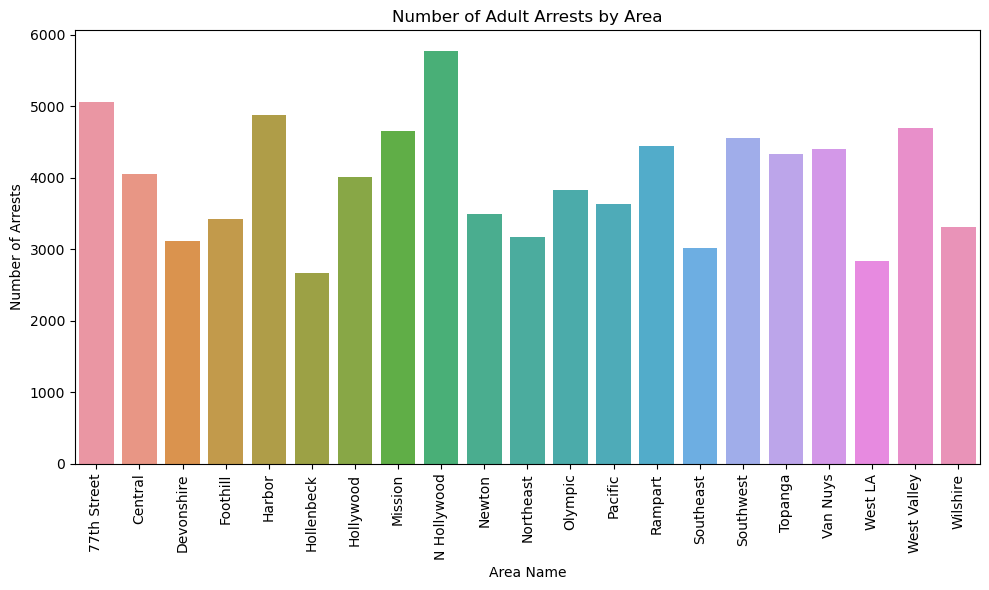

In [2]:
aStatus_desc = crime[crime["Status Desc"] == "Adult Arrest"]

arrest_by_area = aStatus_desc.groupby("AREA NAME").size().reset_index()

arrest_by_area.columns = ['AREA NAME', 'ARREST COUNT']

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

sns.barplot(x='AREA NAME', y='ARREST COUNT', data=arrest_by_area)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Adult Arrests by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Arrests')

# Show the plot
plt.tight_layout()

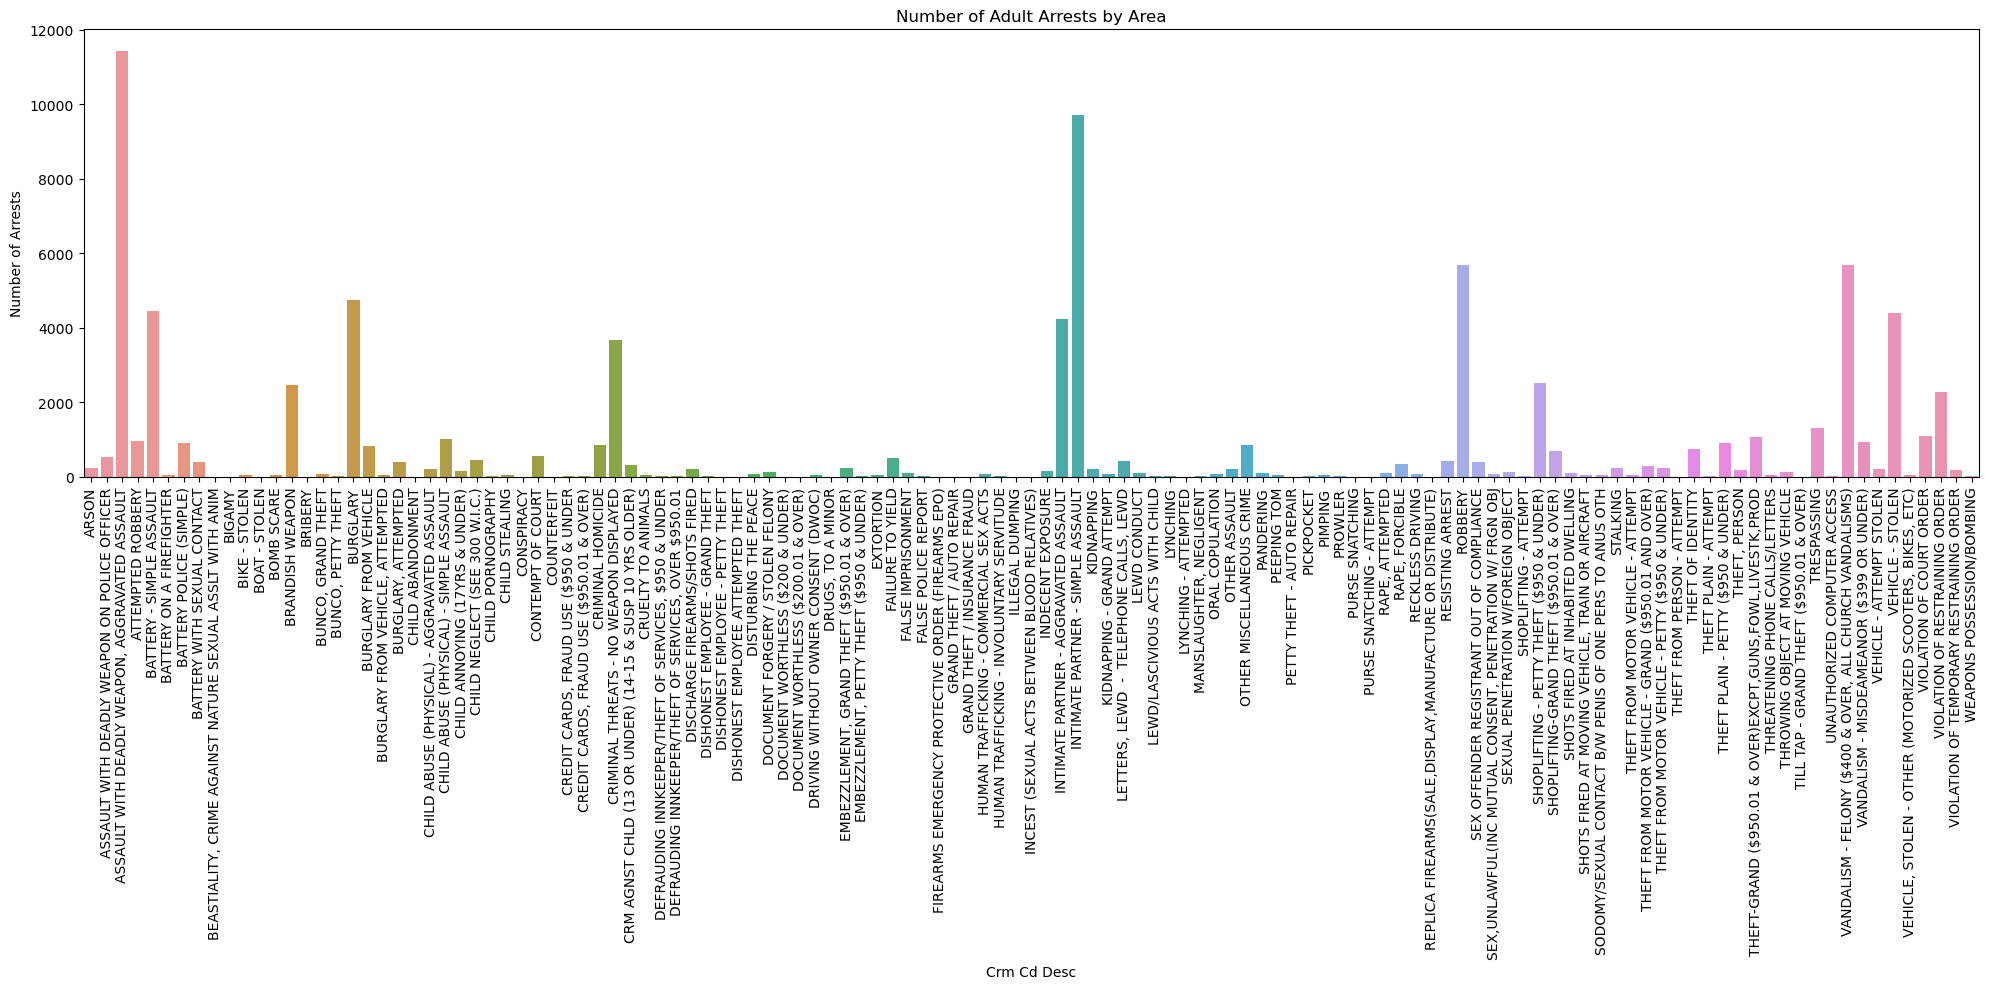

In [5]:
aStatus_desc = crime[crime["Status Desc"] == "Adult Arrest"]

arrest_by_area = aStatus_desc.groupby("Crm Cd Desc").size().reset_index()

arrest_by_area.columns = ['Crm Cd Desc', 'ARREST COUNT']

# Set the figure size for the plot
plt.figure(figsize=(20, 10))

sns.barplot(x='Crm Cd Desc', y='ARREST COUNT', data=arrest_by_area)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Adult Arrests by Area')
plt.xlabel('Crm Cd Desc')
plt.ylabel('Number of Arrests')

# Show the plot
plt.tight_layout()

C:\Users\ryan\AppData\Local\Temp\ipykernel_8356\1265486401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aStatus_desc['arrest_date'] = pd.to_datetime(aStatus_desc['DATE OCC'])
C:\Users\ryan\AppData\Local\Temp\ipykernel_8356\1265486401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aStatus_desc['month'] = aStatus_desc['arrest_date'].dt.month


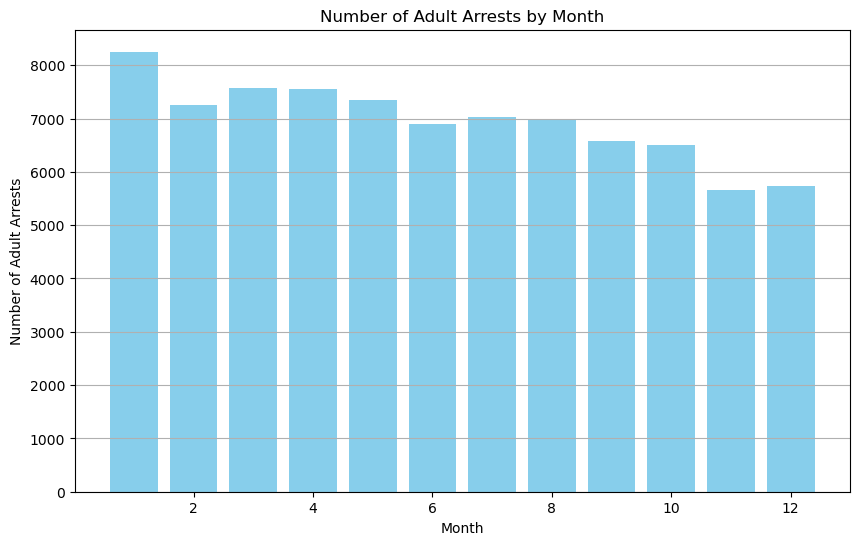

In [8]:
aStatus_desc = crime[crime["Status Desc"] == "Adult Arrest"]

aStatus_desc['arrest_date'] = pd.to_datetime(aStatus_desc['DATE OCC'])

# Extract month from the arrest_date
aStatus_desc['month'] = aStatus_desc['arrest_date'].dt.month

monthly_arrests = aStatus_desc.groupby('month').size()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(monthly_arrests.index, monthly_arrests.values, color='skyblue')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Number of Adult Arrests')
plt.title('Number of Adult Arrests by Month')

# Adding grid for better readability
plt.grid(axis='y')

# Display the plot


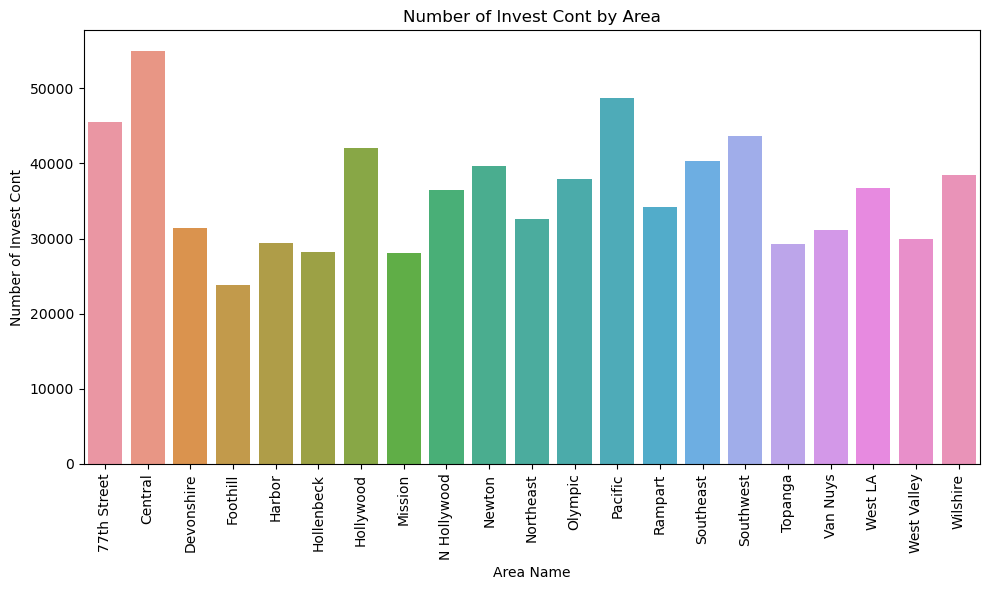

In [4]:
aStatus_desc = crime[crime["Status Desc"] == "Invest Cont"]

arrest_by_area = aStatus_desc.groupby("AREA NAME").size().reset_index()

arrest_by_area.columns = ['AREA NAME', 'Invest Cont']

# Set the figure size for the plot
plt.figure(figsize=(10, 6))

sns.barplot(x='AREA NAME', y='Invest Cont', data=arrest_by_area)

# Rotate the x labels for better readability
plt.xticks(rotation=90)

# Set the title and labels
plt.title('Number of Invest Cont by Area')
plt.xlabel('Area Name')
plt.ylabel('Number of Invest Cont')

# Show the plot
plt.tight_layout()


###### - np.ones()

Now we have extablished the pattern no matter how we filter the data it  show academic preformance below 2 is consentrated
around having 3 stress factors

######  looking  at the columns of academic preformance we notice that the relationship academic preformance is moderatly strong negative or postive, so take any 3 moderatly strong relationship and will see a consentration of poor grades


#### I suspect to see higher grades than average, These are 3 postive orentiened correlations having higher scores in 3 good categories

###### - Summation

###### - Difference

TypeError: reduction operation 'argmin' not allowed for this dtype

NameError: name 'sales' is not defined